In this project I have done both face detection on image and then face recognition on live camera using opencv. For face detection I have created some function that will detect eye and face on image using haarcascade classifier. For face recognition I first detect the face on live camera then collected some images have unique user id in directory then trained the model. After training used LBPH(Local Binary Patterns Histogram) algorithm as recognizer to recognize the image 


# Face Detection

### Importing all the required libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread("D:\Computer Vision(Open CV)\DATA\Profile_pic.jpg") # reading the image 

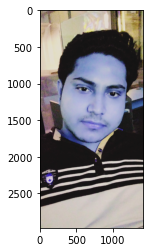

In [3]:
plt.imshow(img) # Image looking here like this because opencv reading the image in BGR format

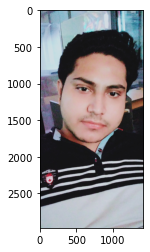

In [4]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # converting image from BGR(Blue,Green,Red) format to RGB(Red,Green,Blue) format
plt.imshow(img)

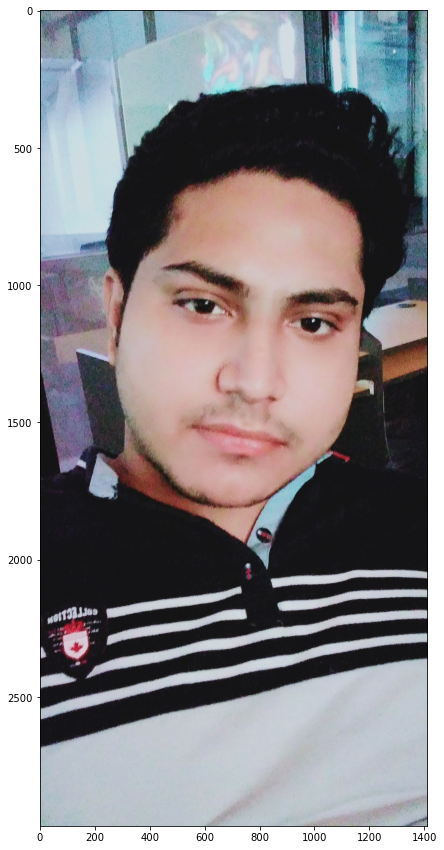

In [5]:
fig = plt.figure(figsize = (15,15)) 
ax = fig.add_subplot(111)
ax.imshow(img)

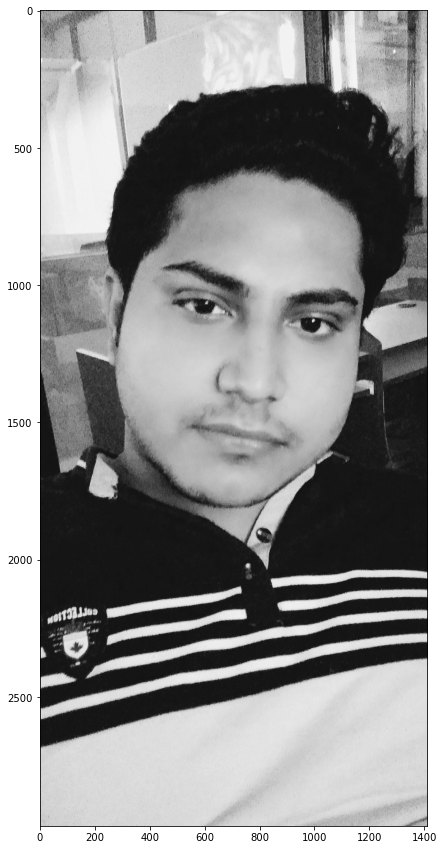

In [6]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  # Converting the image from BGR to Gray
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.imshow(img,cmap = 'gray')

In [7]:
# Function to detect face in image

def detect_face(img):
    
    face_cascade = cv2.CascadeClassifier("D:\Computer Vision(Open CV)\DATA\haarcascades/haarcascade_frontalface_default.xml")
    face_rectangle = face_cascade.detectMultiScale(img,scaleFactor = 1.3,minNeighbors =5)
    
    for (x,y,w,h) in face_rectangle:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),16)
        
    return img

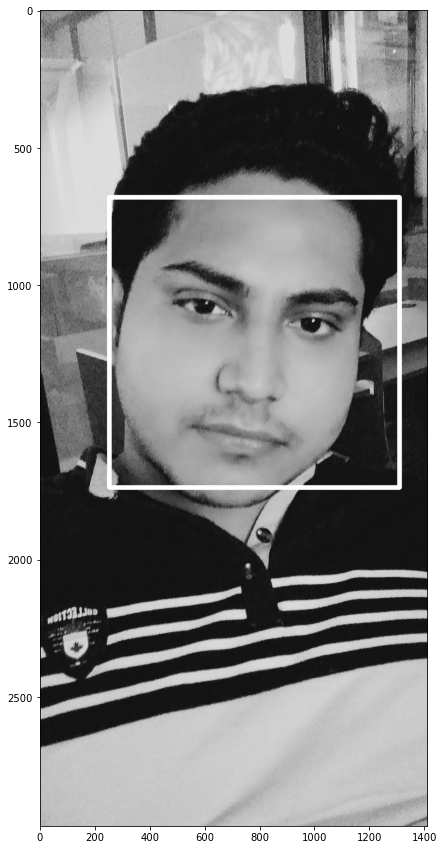

In [8]:
result = detect_face(img)               # Seeing the detected face in image
fig = plt.figure(figsize =(15,15))
ax = fig.add_subplot(111)
ax.imshow(result,cmap='gray')

In [9]:
# Function to detect eyes in image

def detect_eyes(img):
    
    eye_cascade = cv2.CascadeClassifier("D:\Computer Vision(Open CV)\DATA\haarcascades\haarcascade_eye.xml")
    
    eye_rectangle = eye_cascade.detectMultiScale(img,scaleFactor = 1.8,minNeighbors =7)
    
    for (x,y,w,h) in eye_rectangle:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),10)
        
    return img

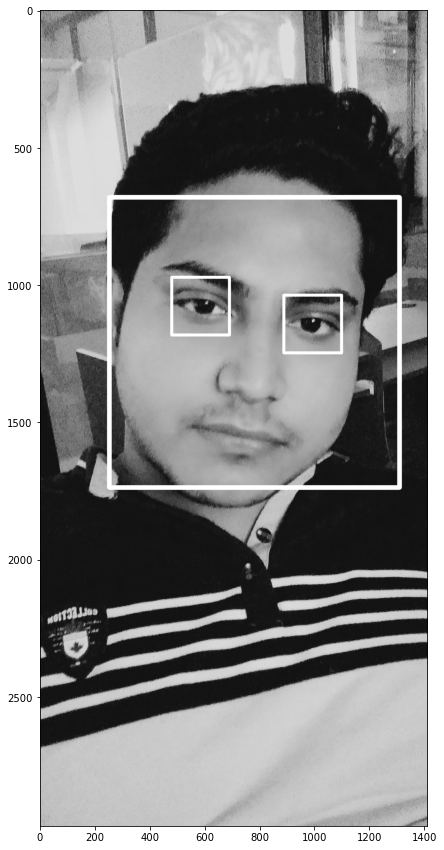

In [10]:
result2 = detect_eyes(result)          # Seeing detected eyes and face in image
fig = plt.figure(figsize =(15,15))
ax = fig.add_subplot(111)
ax.imshow(result2,cmap='gray')

In [11]:
img = cv2.imread("D:\Computer Vision(Open CV)\DATA\Profile_pic.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [12]:
# Function to detect eye and face simultaneously

def face_eye_detection(img):
    
    face_cascade = cv2.CascadeClassifier("D:\Computer Vision(Open CV)\DATA\haarcascades/haarcascade_frontalface_default.xml")
    face_rectangle = face_cascade.detectMultiScale(img,scaleFactor = 1.3,minNeighbors =5)
    
    for (x,y,w,h) in face_rectangle:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),10)
        
    
    eye_cascade = cv2.CascadeClassifier("D:\Computer Vision(Open CV)\DATA\haarcascades\haarcascade_eye.xml")    
    eye_rectangle = eye_cascade.detectMultiScale(img,scaleFactor = 1.8,minNeighbors =7)
    
    for (x1,y1,w1,h1) in eye_rectangle:
        cv2.rectangle(img,(x1,y1),(x1+w1,y1+h1),(0,0,255),5)
        
    return img

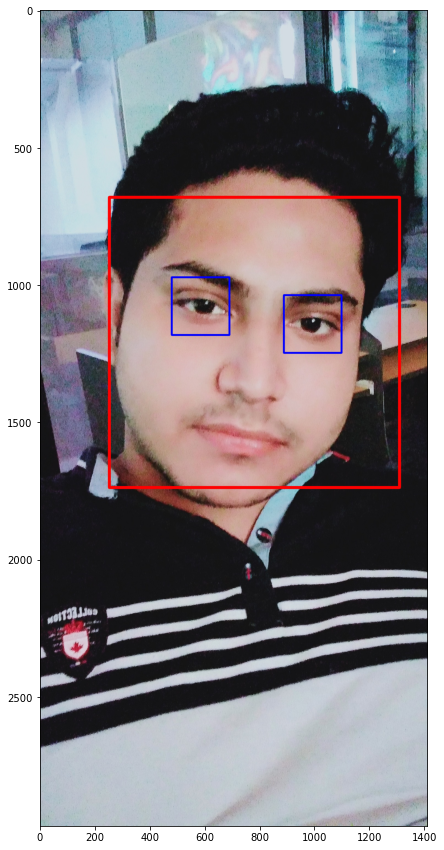

In [13]:
result3 = face_eye_detection(img)    # Seeing the detected face and eye in original image
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)
ax.imshow(result3)

### Setting Camera for video capture 

In [14]:

cap = cv2.VideoCapture(0)

if cap.isOpened()== False:
    cap.open()
    
while True:
    
    ret,frame = cap.read()
    
    if ret== False:
        print('Camera cannot capture frame')
        break
    
    
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame',gray)
    
    if cv2.waitKey(27) & 0xFF == ord('q'):
        break
    

    
    
cap.release()
cv2.destroyAllWindows()

### Detecting face and drawing rectangle around the face in live video

In [15]:
def face_rectangle(img):
    
    face_cascade = cv2.CascadeClassifier("D:\Computer Vision(Open CV)\DATA\haarcascades/haarcascade_frontalface_default.xml")
    face_rectangle = face_cascade.detectMultiScale(img,scaleFactor = 1.2,minNeighbors=5)
    for (x,y,w,h) in face_rectangle:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),5)
        
    return img

In [16]:
cap = cv2.VideoCapture(0)

if cap.isOpened()== False:
    cap.open()
    
while True:
    
    ret,frame = cap.read()
    
    if ret== False:
        print('Camera cannot capture frame')
        break
    
    
    
    frame = face_rectangle(frame)
    cv2.imshow('frame',frame)
    
    if cv2.waitKey(27) & 0xFF == ord('q'):
        break
    

    
    
cap.release()
cv2.destroyAllWindows()

### Detecting eye and and drawing rectangle around the face in live video

In [17]:
def eye_rectangle(img):
    
    eye_cascade = cv2.CascadeClassifier("D:\Computer Vision(Open CV)\DATA\haarcascades\haarcascade_eye.xml")
    eye_rectangle = eye_cascade.detectMultiScale(img,scaleFactor=1.3,minNeighbors=7)
    
    for (ex,ey,ew,eh) in eye_rectangle:
        cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),(125,23,50),5)
    
    return img

In [18]:
cap = cv2.VideoCapture(0)

if cap.isOpened()== False:
    cap.open()
    
while True:
    
    ret,frame = cap.read()
    
    if ret== False:
        print('Camera cannot capture frame')
        break
    
    
    
    frame = eye_rectangle(frame)
    cv2.imshow('frame',frame)
    
    if cv2.waitKey(27) & 0xFF == ord('q'):
        break
    

    
    
cap.release()
cv2.destroyAllWindows()

### Detecting face and eye simultaneously and drawing rectangle around them in live video

In [19]:
def face_eye_rectangle(img):
    
    face_cascade = cv2.CascadeClassifier("D:\Computer Vision(Open CV)\DATA\haarcascades/haarcascade_frontalface_default.xml")
    face_rectangle = face_cascade.detectMultiScale(img,scaleFactor = 1.2,minNeighbors=5)
    for (x,y,w,h) in face_rectangle:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),5)
        
    eye_cascade = cv2.CascadeClassifier("D:\Computer Vision(Open CV)\DATA\haarcascades\haarcascade_eye.xml")
    eye_rectangle = eye_cascade.detectMultiScale(img,scaleFactor=1.3,minNeighbors=7)
    
    for (ex,ey,ew,eh) in eye_rectangle:
        cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),(125,23,50),5)
    
    return img
        

In [20]:
cap = cv2.VideoCapture(0)

if cap.isOpened()== False:
    cap.open()
    
while True:
    
    ret,frame = cap.read()
    
    if ret== False:
        print('Camera cannot capture frame')
        break
    
    
    
    frame = face_eye_rectangle(frame)
    cv2.imshow('frame',frame)
    
    if cv2.waitKey(27) & 0xFF == ord('q'):
        break
    

    
    
cap.release()
cv2.destroyAllWindows()

# Face Recognition

### Gathering of the Data

In [21]:
import cv2
import os
import numpy as np
from PIL import Image

In [24]:
face_cascade = cv2.CascadeClassifier("D:\Computer Vision(Open CV)\DATA\haarcascades/haarcascade_frontalface_default.xml")

camera = cv2.VideoCapture(0)


if camera.isOpened()== False:
        camera.open()


face_id = input('Enter user id and press enter')
count=0

while True:
    
    
    ret,image = camera.read()
    
    if ret== False:
        print('camera cannot capture image')
        
        
    gray =cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(gray,1.3,5)
        
    for (x,y,w,h) in face:
            
        cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
            
        count = count + 1
            
        cv2.imwrite(r'D:\computer vision\Dataset\user.' + str(face_id) + '.' + str(count) + '.jpg' ,gray[y:y+h,x:x+w])
            
            
        cv2.imshow('img',image)
            
    k = cv2.waitKey(100) & 0xFF
    if k == 27:
        break
                
    elif count>=50:
        break
                
                
print('Image data collected')
                
                
camera.release()
cv2.destroyAllWindows()
            
            
        

Enter user id and press enter3
Image data collected


### Training the image data

In [25]:
path = 'D:\computer vision\Dataset'

face_cascade = cv2.CascadeClassifier("D:\Computer Vision(Open CV)\DATA\haarcascades/haarcascade_frontalface_default.xml")

recognizer = cv2.face.LBPHFaceRecognizer_create()

def getImagesAndLabels(path):
    imagePaths = [os.path.join(path,f) for f in os.listdir(path)]     
    faceSamples=[]
    ids = []
    for imagePath in imagePaths:
        PIL_img = Image.open(imagePath).convert('L') # grayscale
        img_numpy = np.array(PIL_img,'uint8')
        id = int(os.path.split(imagePath)[-1].split(".")[1])
        faces = face_cascade.detectMultiScale(img_numpy)
        for (x,y,w,h) in faces:
            faceSamples.append(img_numpy[y:y+h,x:x+w])
            ids.append(id)
    return faceSamples,ids

faces,ids = getImagesAndLabels(path)
recognizer.train(faces, np.array(ids))


recognizer.write('D:/computer vision/Training data/trainer.yml')

# Print the numer of faces trained and end program
print("\n [INFO] {0} faces trained. Exiting Program".format(len(np.unique(ids))))


 [INFO] 3 faces trained. Exiting Program


### Setting the camera for recognizing the face in live camera

In [26]:
recognizer.read('D:/computer vision/Training data/trainer.yml')
font = cv2.FONT_HERSHEY_SIMPLEX

id = 0

names = ['None','Abhishek','Govind','Indu']


camera = cv2.VideoCapture(0)


while True:
    
    ret,image =camera.read()
    
    if ret == False:
        print('Camera cannot capture image')
        
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
        
        id, confidence = recognizer.predict(gray[y:y+h,x:x+w])
        
        if (confidence < 100):
            id = names[id]
            confidence = "  {0}%".format(round(100 - confidence))
        else:
            id = "unknown"
            confidence = "  {0}%".format(round(100 - confidence))
        
        cv2.putText(
                    image, 
                    str(id), 
                    (x+5,y-5), 
                    font, 
                    1, 
                    (255,255,255), 
                    2
                   )
        cv2.putText(
                    image, 
                    str(confidence), 
                    (x+5,y+h-5), 
                    font, 
                    1, 
                    (255,255,0), 
                    1
                   )  
        cv2.imshow('img',image)
        
    k = cv2.waitKey(10) & 0xff # Press 'ESC' for exiting video
    if k == 27:
        break
# Do a bit of cleanup
print("\n [INFO] Exiting Program and cleanup stuff")
camera.release()
cv2.destroyAllWindows()


 [INFO] Exiting Program and cleanup stuff


In [27]:
recognizer.read('D:/computer vision/Training data/trainer.yml')
font = cv2.FONT_HERSHEY_SIMPLEX

id = 0

names = ['None','Abhishek','Govind','Indu']


camera = cv2.VideoCapture(0)


while True:
    
    ret,image =camera.read()
    
    if ret == False:
        print('Camera cannot capture image')
        
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
        
        id, confidence = recognizer.predict(gray[y:y+h,x:x+w])
        
        if (id==1):
            id = 'Abhishek'
            
        elif (id==2):
            id = 'Govind'
            
        elif (id==3):
            id = 'Indu'
            
        else:
            id = 'Unknown'
        
      
        
        cv2.putText(
                    image, 
                    str(id), 
                    (x+5,y-5), 
                    font, 
                    1, 
                    (255,255,255), 
                    2
                   )
        
        cv2.imshow('img',image)
        
    k = cv2.waitKey(10) & 0xff # Press 'ESC' for exiting video
    if k == 27:
        break
# Do a bit of cleanup
print("\n [INFO] Exiting Program and cleanup stuff")
camera.release()
cv2.destroyAllWindows()


 [INFO] Exiting Program and cleanup stuff
